In [1]:
# Dataset: Mall Customers Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

In [2]:
# 1. Load Dataset
# ----------------------------
df = pd.read_csv("Mall_Customers.csv")
print(df.head())
print(df.info())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


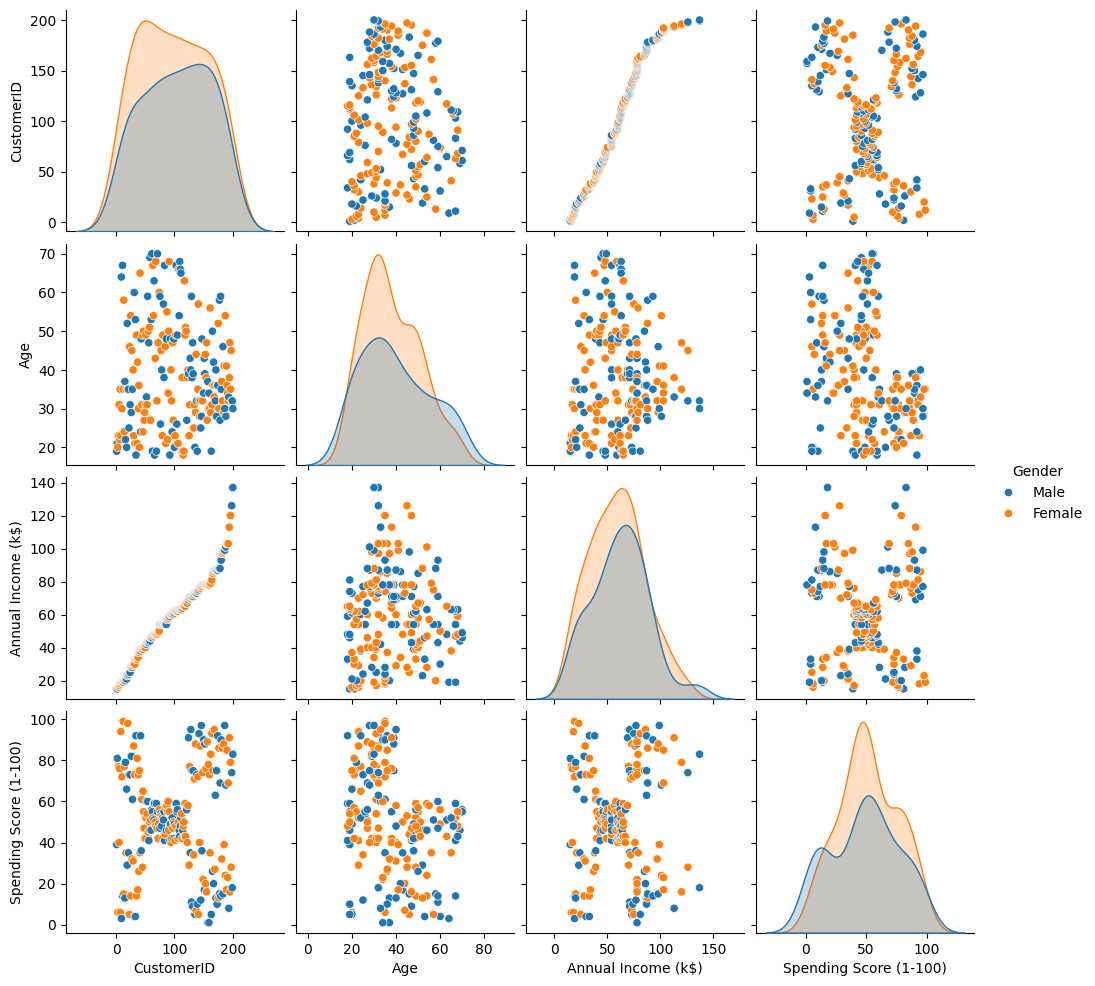

Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


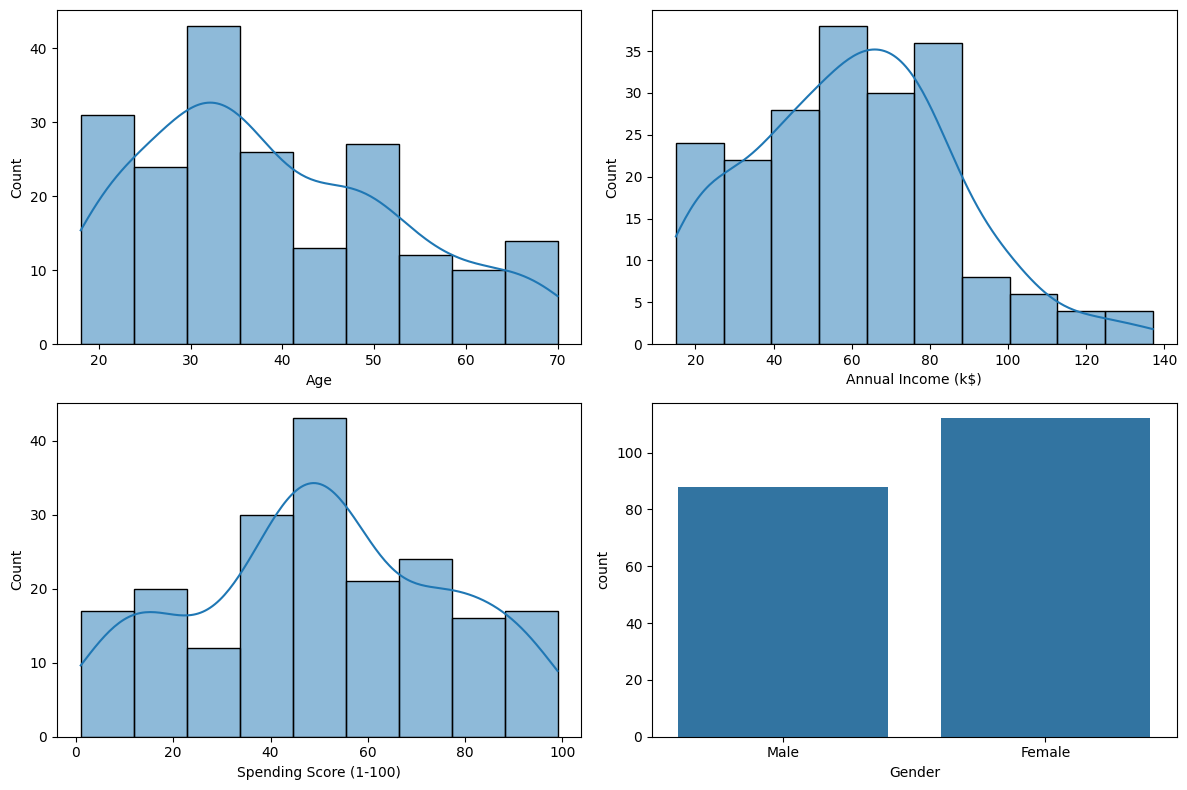

In [3]:
# 2. EDA
# ----------------------------
print(df.describe())
sns.pairplot(df, hue="Gender")
plt.show()

# Missing values check
print("Missing values:\n", df.isnull().sum())

# Distribution of features
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(df["Age"], kde=True, ax=axes[0,0])
sns.histplot(df["Annual Income (k$)"], kde=True, ax=axes[0,1])
sns.histplot(df["Spending Score (1-100)"], kde=True, ax=axes[1,0])
sns.countplot(x="Gender", data=df, ax=axes[1,1])
plt.tight_layout()
plt.show()


In [4]:
# 3. Preprocessing
# ----------------------------
# Encode Gender
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

# Select features
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)", "Gender"]]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

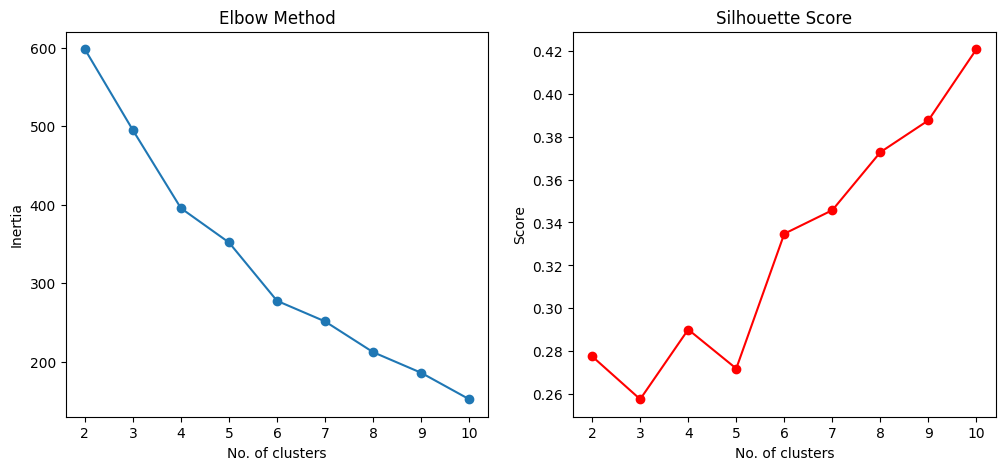

In [5]:
# 4. Find optimal clusters
# ----------------------------
inertia = []
sil_scores = []
K = range(2, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, km.labels_))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K, inertia, 'o-')
plt.title("Elbow Method")
plt.xlabel("No. of clusters")
plt.ylabel("Inertia")

plt.subplot(1,2,2)
plt.plot(K, sil_scores, 'o-', color="red")
plt.title("Silhouette Score")
plt.xlabel("No. of clusters")
plt.ylabel("Score")
plt.show()


In [6]:
# 5. Apply K-Means
# ----------------------------
k_optimal = 5   # usually 4 or 5 is best for this dataset
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

print(df.groupby("Cluster").mean())

         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         65.333333  0.509804  56.470588           46.098039   
1        159.500000  1.000000  39.500000           85.150000   
2        100.809524  1.000000  28.690476           60.904762   
3        151.510204  0.000000  37.897959           82.122449   
4         50.526316  0.000000  27.315789           38.842105   

         Spending Score (1-100)  
Cluster                          
0                     39.313725  
1                     14.050000  
2                     70.238095  
3                     54.448980  
4                     56.210526  


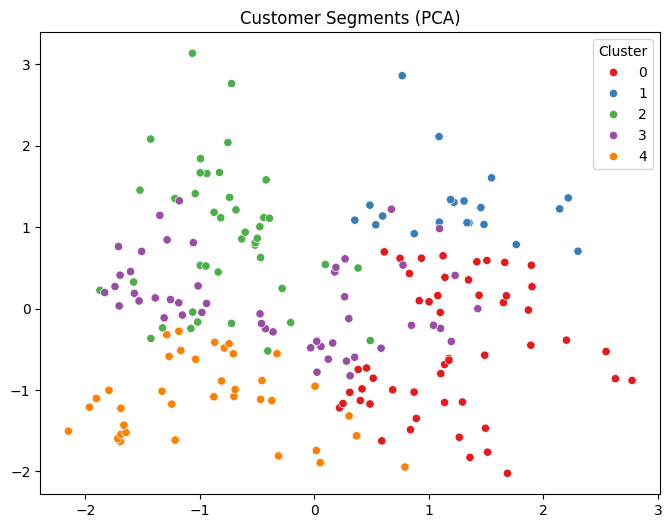

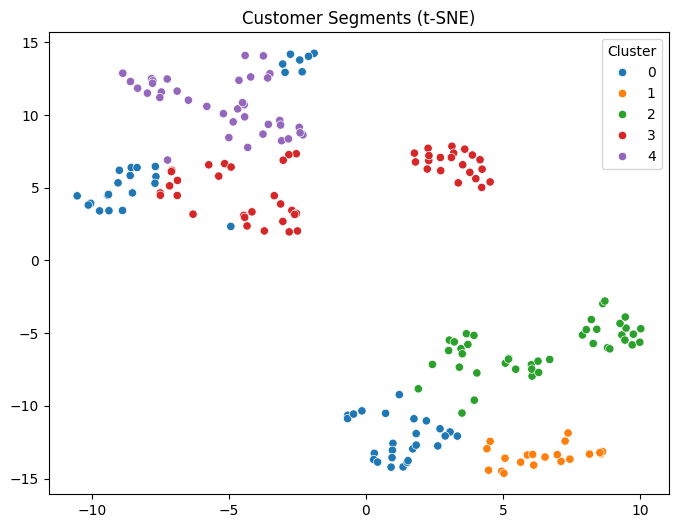

In [13]:
# 6. Visualization with PCA & t-SNE
# ----------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df["Cluster"], palette="Set1")
plt.title("Customer Segments (PCA)")
plt.show()

# t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=df["Cluster"], palette="tab10")
plt.title("Customer Segments (t-SNE)")
plt.show()

In [11]:
# 7. Marketing Strategy Suggestions
# ----------------------------
for c in df["Cluster"].unique():
    cluster_data = df[df["Cluster"] == c]
    print(f"\nCluster {c} Profile:")
    print(cluster_data.describe())
    # Strategy idea
    if cluster_data["Annual Income (k$)"].mean() > 70 and cluster_data["Spending Score (1-100)"].mean() > 60:
        print(" Strategy: Premium offers, luxury products, loyalty programs.")
    elif cluster_data["Annual Income (k$)"].mean() < 40 and cluster_data["Spending Score (1-100)"].mean() > 60:
        print(" Strategy: Affordable trendy products, discounts.")
    elif cluster_data["Spending Score (1-100)"].mean() < 40:
        print(" Strategy: Awareness campaigns, low-budget promotions.")
    else:
        print(" Strategy: Balanced offers, seasonal marketing.")


Cluster 2 Profile:
       CustomerID  Gender        Age  Annual Income (k$)  \
count   42.000000    42.0  42.000000           42.000000   
mean   100.809524     1.0  28.690476           60.904762   
std     61.330865     0.0   7.110583           29.017917   
min      1.000000     1.0  18.000000           15.000000   
25%     44.500000     1.0  22.500000           39.000000   
50%    102.000000     1.0  28.500000           61.500000   
75%    149.000000     1.0  34.750000           77.750000   
max    200.000000     1.0  40.000000          137.000000   

       Spending Score (1-100)  Cluster  
count               42.000000     42.0  
mean                70.238095      2.0  
std                 17.621785      0.0  
min                 35.000000      2.0  
25%                 55.250000      2.0  
50%                 73.000000      2.0  
75%                 86.750000      2.0  
max                 97.000000      2.0  
 Strategy: Balanced offers, seasonal marketing.

Cluster 4 Profile:
  